In [27]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [28]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [29]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


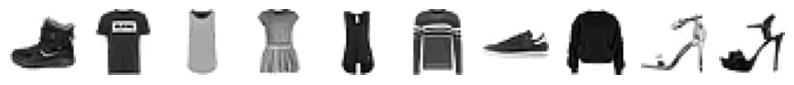

In [30]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize=(10, 10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')

plt.show()

In [31]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [32]:
import numpy as np
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [33]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28 * 28)

In [34]:
print(train_scaled.shape)

(60000, 784)


In [35]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss = 'log_loss', max_iter = 5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

/Users/leewonseok/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/leewonseok/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/leewonseok/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/leewonseok/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Use

0.8192833333333333


In [36]:
import tensorflow as tf

In [37]:
from tensorflow import keras

In [38]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)


In [39]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [40]:
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


In [41]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))

In [42]:
model = keras.Sequential(dense)

In [43]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [44]:
model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 1s 422us/step - loss: 0.6085 - accuracy: 0.7906
Epoch 2/5
1500/1500 [==============================] - 1s 421us/step - loss: 0.4789 - accuracy: 0.8393
Epoch 3/5
1500/1500 [==============================] - 1s 415us/step - loss: 0.4569 - accuracy: 0.8475
Epoch 4/5
1500/1500 [==============================] - 1s 416us/step - loss: 0.4436 - accuracy: 0.8520
Epoch 5/5
1500/1500 [==============================] - 1s 418us/step - loss: 0.4359 - accuracy: 0.8537


In [45]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 402us/step - loss: 0.4419 - accuracy: 0.8538


[0.4419270157814026, 0.8538333177566528]

In [46]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

In [47]:
dense1 = keras.layers.Dense(100, activation = 'sigmoid', input_shape = (784,))
dense2 = keras.layers.Dense(10, activation='softmax')

In [48]:
model = keras.Sequential([dense1, dense2])

In [49]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [50]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation = 'sigmoid', input_shape = (784,)))
model.add(keras.layers.Dense(10, activation= 'softmax'))

In [51]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.compile(loss='sparse_categorical_crossentropy',  metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5
1200/1200 [==============================] - 1s 922us/step - loss: 0.5974 - accuracy: 0.7994
Epoch 2/5
1200/1200 [==============================] - 1s 717us/step - loss: 0.4238 - accuracy: 0.8477
Epoch 3/5
1200/1200 [==============================] - 1s 726us/step - loss: 0.3884 - accuracy: 0.8605
Epoch 4/5
1200/1200 [==============================] - 1s 756us/step - loss: 0.3662 - accuracy: 0.8673
Epoch 5/5
1200/1200 [==============================] - 1s 706us/step - loss: 0.3477 - accuracy: 0.8758


### 렐루 함수

In [65]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape = (28, 28)))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [66]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 100)               78500     
                                                                 
 dense_15 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [67]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

In [68]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 1s 730us/step - loss: 0.5307 - accuracy: 0.8134
Epoch 2/5
1500/1500 [==============================] - 1s 854us/step - loss: 0.3929 - accuracy: 0.8585
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3546 - accuracy: 0.8727
Epoch 4/5
1500/1500 [==============================] - 1s 903us/step - loss: 0.3333 - accuracy: 0.8808
Epoch 5/5
1500/1500 [==============================] - 1s 826us/step - loss: 0.3167 - accuracy: 0.8865


In [69]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 601us/step - loss: 0.3823 - accuracy: 0.8653


[0.38225698471069336, 0.8653333187103271]

In [71]:
model.compile(optimizer='sgd', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [73]:
# 위 한줄 코드랑 같은 코드임
sgd = keras.optimizers.SGD()
model.compile(optimizer=sgd, loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [74]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape = (28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))


In [75]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 1s 743us/step - loss: 0.5207 - accuracy: 0.8191
Epoch 2/5
1500/1500 [==============================] - 1s 702us/step - loss: 0.3914 - accuracy: 0.8583
Epoch 3/5
1500/1500 [==============================] - 1s 670us/step - loss: 0.3510 - accuracy: 0.8705
Epoch 4/5
1500/1500 [==============================] - 1s 673us/step - loss: 0.3241 - accuracy: 0.8802
Epoch 5/5
1500/1500 [==============================] - 1s 704us/step - loss: 0.3061 - accuracy: 0.8870


In [76]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 479us/step - loss: 0.3370 - accuracy: 0.8769


[0.3370439112186432, 0.8769166469573975]

### 손실곡선

In [77]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

In [80]:
def model_fn(a_layer = None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape = (28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [81]:
model = model_fn()
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 100)               78500     
                                                                 


 dense_21 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [82]:
model.compile(loss='sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 5, verbose = 0)

In [83]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


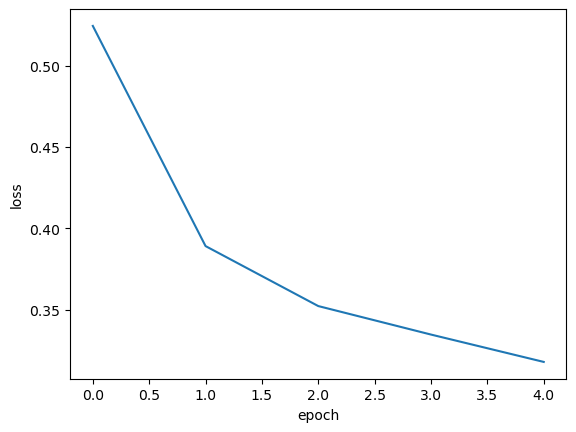

In [84]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


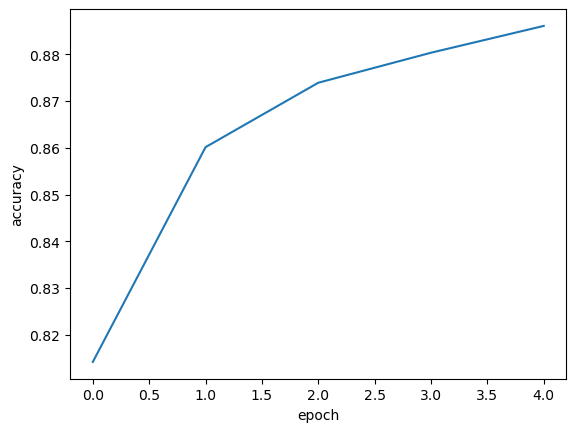

In [85]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()


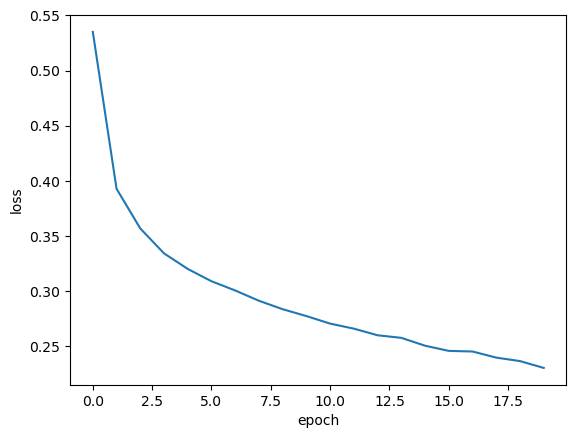

In [86]:
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose = 0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [87]:
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose = 0, validation_data=(val_scaled, val_target))

In [89]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


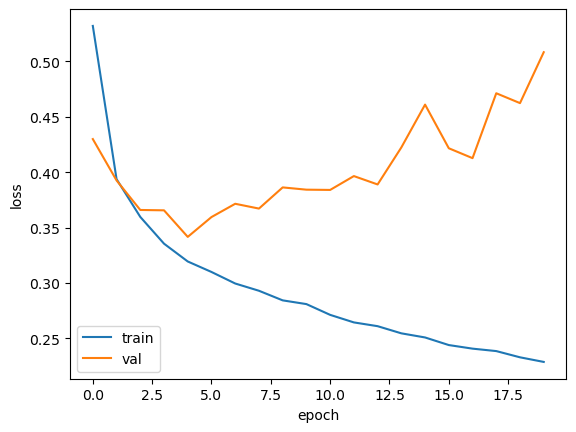

In [90]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

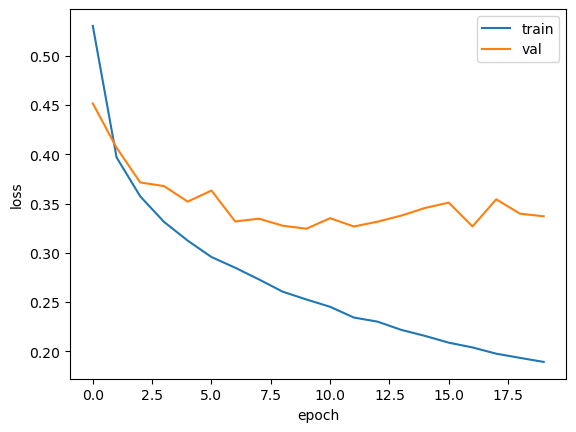

In [91]:
model = model_fn()
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [92]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_28 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_29 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


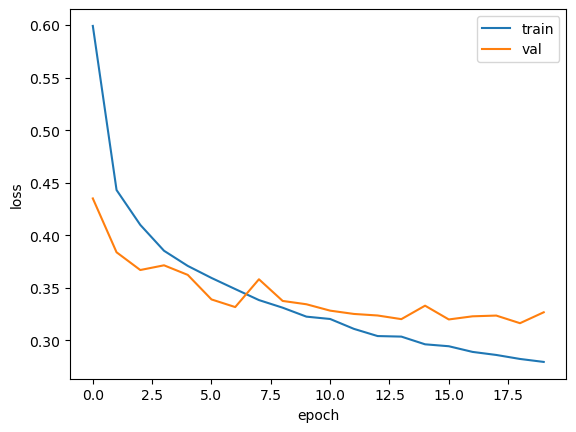

In [93]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [94]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics= 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 10, verbose = 0, validation_data=(val_scaled, val_target))

In [97]:
model.save_weights('model-weights.h5')

In [98]:
model.save('model-whole.h5')

In [99]:
!ls -al *.h5

-rw-r--r--@ 1 leewonseok  staff  333320 Sep 25 10:20 model-weights.h5
-rw-r--r--@ 1 leewonseok  staff  982480 Sep 25 10:20 model-whole.h5


In [108]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

In [109]:
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis = -1)
print(np.mean(val_labels == val_target))

375/375 [==============================] - 0s 427us/step
0.88375


In [110]:
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 483us/step - loss: 0.3213 - accuracy: 0.8838


[0.3212589621543884, 0.8837500214576721]

In [111]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
model.fit(train_scaled, train_target, epochs=20, verbose = 0, validation_data= (val_scaled, val_target), callbacks=[checkpoint_cb])

In [112]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 511us/step - loss: 0.3193 - accuracy: 0.8859


[0.3192848563194275, 0.8859166502952576]

In [113]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics= 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose = 0, validation_data=(val_scaled, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

In [114]:
print(early_stopping_cb.stopped_epoch)

8


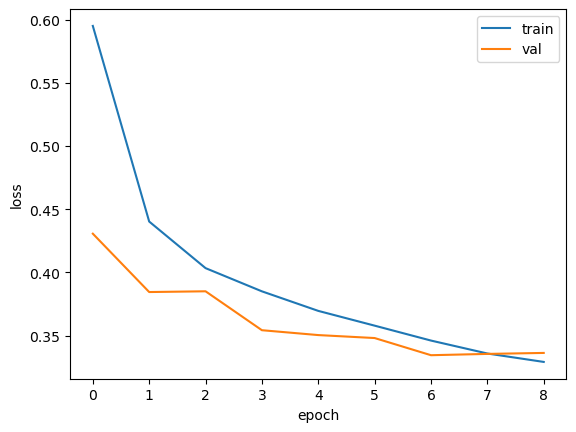

In [115]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [116]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 489us/step - loss: 0.3344 - accuracy: 0.8776


[0.33443453907966614, 0.8775833249092102]